# SVM for classification

Load IRIS dataset, check its contents:


In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [ ]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [ ]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Chargement du dataset IRIS
iris = datasets.load_iris()

# Sélection des deux premières caractéristiques
X = iris.data[:, :2]
y = iris.target

# Suppression des données de la classe 2
X = X[y != 2]
y = y[y != 2]

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

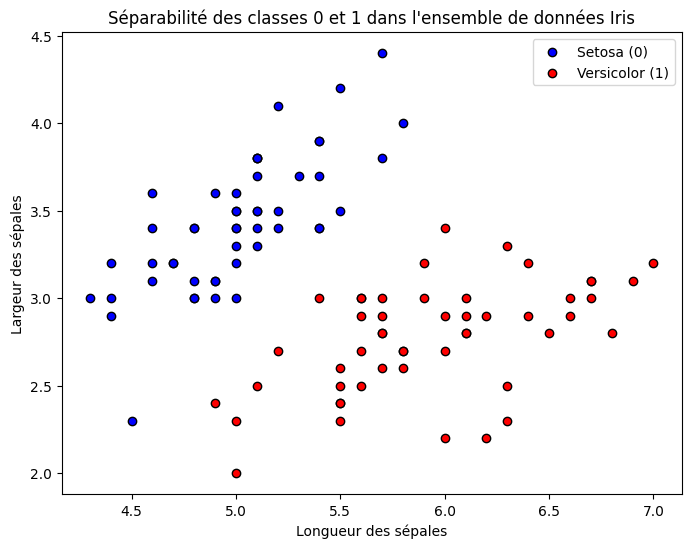

In [25]:
import matplotlib.pyplot as plt
from sklearn import datasets

# Charger les données Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Sélectionner uniquement les deux premières caractéristiques
y = iris.target

# Filtrer pour ne garder que les classes 0 et 1
X = X[y != 2]
y = y[y != 2]

# Affichage du scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Setosa (0)", color='blue', edgecolors='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Versicolor (1)", color='red', edgecolors='k')

plt.xlabel("Longueur des sépales")
plt.ylabel("Largeur des sépales")
plt.legend()
plt.title("Séparabilité des classes 0 et 1 dans l'ensemble de données Iris")
plt.show()



Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

Précision du modèle avec C=200: 1.00


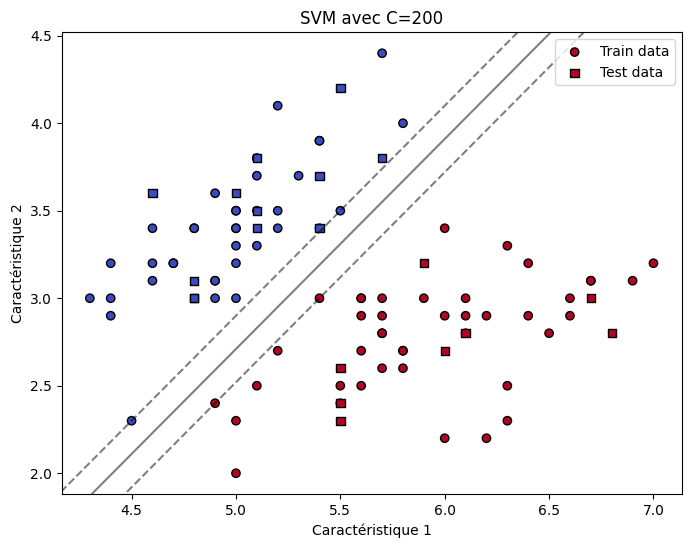

In [26]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Charger le dataset Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # On prend seulement les 2 premières caractéristiques
y = iris.target

# Filtrer pour ne garder que les classes 0 et 1 (Setosa et Versicolor)
X = X[y != 2]
y = y[y != 2]

# Séparer en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle SVM avec différents C
C_value = 200  # Tu peux essayer aussi 1.0 (par défaut)
svm_model = SVC(kernel='linear', C=C_value)
svm_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
accuracy = svm_model.score(X_test, y_test)
print(f"Précision du modèle avec C={C_value}: {accuracy:.2f}")

# Tracer la frontière de décision
plt.figure(figsize=(8, 6))

# Afficher les points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', label="Train data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', marker="s", label="Test data")

# Tracer la frontière de décision
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracer les lignes de séparation
plt.contour(xx, yy, Z, colors='black', levels=[-1, 0, 1], alpha=0.5, linestyles=['dashed', 'solid', 'dashed'])

plt.title(f"SVM avec C={C_value}")
plt.xlabel("Caractéristique 1")
plt.ylabel("Caractéristique 2")
plt.legend()
plt.show()


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

Score du modèle SVM : 1.0


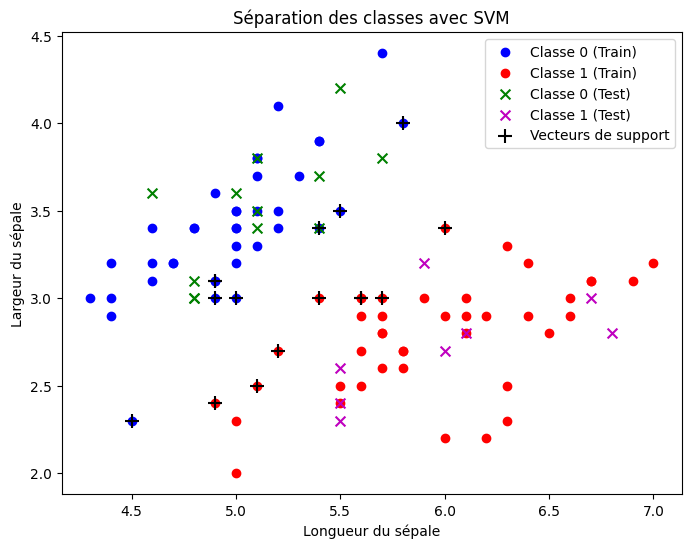

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Chargement du dataset IRIS
iris = datasets.load_iris()

# Sélection des deux premières caractéristiques
X = iris.data[:, :2]
y = iris.target

# Suppression des données de la classe 2
X = X[y != 2]
y = y[y != 2]

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle SVM
C = 1.0  # Paramètre de régularisation
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_train, y_train)

# Affichage des résultats
print(f"Score du modèle SVM : {clf.score(X_test, y_test)}")

# Création du graphique de dispersion
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='b', label='Classe 0 (Train)')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='r', label='Classe 1 (Train)')
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c='g', marker='x', s=50, label='Classe 0 (Test)')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='m', marker='x', s=50, label='Classe 1 (Test)')

# Ajout des vecteurs de support
sv = clf.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], c='k', marker='+', s=100, label='Vecteurs de support')

plt.xlabel('Longueur du sépale')
plt.ylabel('Largeur du sépale')
plt.title('Séparation des classes avec SVM')
plt.legend()
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

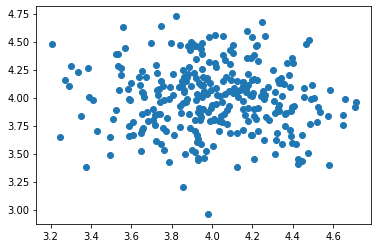

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

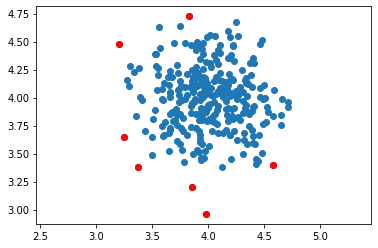

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

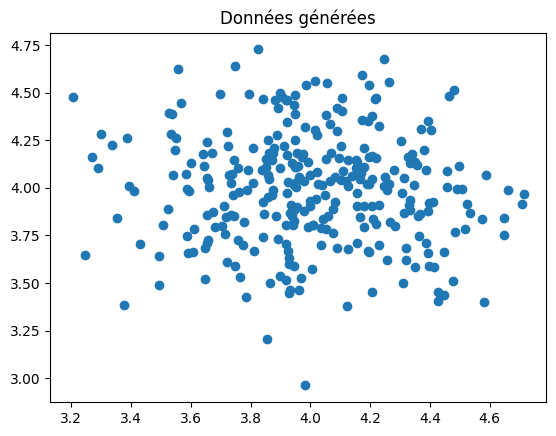

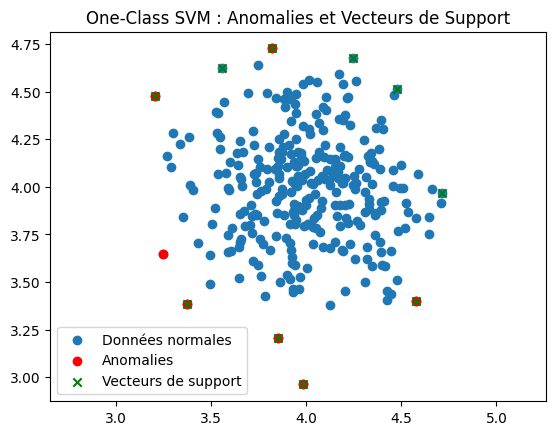

In [19]:
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import where, random

# Générer des données avec un seul cluster
random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.3, center_box=(4, 4))

# Afficher les données initiales
plt.scatter(x[:, 0], x[:, 1])
plt.title("Données générées")
plt.show()

# Initialiser et entraîner un modèle One-Class SVM
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
SVMmodelOne.fit(x)

# Prédictions (-1 = anomalie, 1 = normal)
pred = SVMmodelOne.predict(x)

# Extraire les anomalies
anom_index = where(pred == -1)
values = x[anom_index]

# Affichage des points normaux et des anomalies
plt.scatter(x[:, 0], x[:, 1], label="Données normales")
plt.scatter(values[:, 0], values[:, 1], color='red', label="Anomalies")

# Ajouter les vecteurs de support en vert
plt.scatter(SVMmodelOne.support_vectors_[:, 0],
            SVMmodelOne.support_vectors_[:, 1],
            color='green', marker='x', label="Vecteurs de support")

plt.axis('equal')
plt.legend()
plt.title("One-Class SVM : Anomalies et Vecteurs de Support")
plt.show()



What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

Seuil des anomalies (5% quantile) : 7.45644328742384


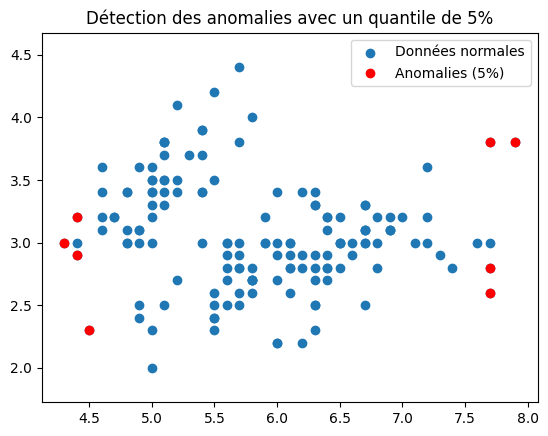

In [21]:
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.datasets import load_iris
from numpy import quantile, where

# Charger les données Iris
iris = load_iris()
X = iris.data[:, :2]  # Prendre seulement les deux premières colonnes

# Initialiser et entraîner One-Class SVM
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
SVMmodelOne.fit(X)

# Obtenir les scores pour chaque point
scores = SVMmodelOne.score_samples(X)

# Définir le seuil avec un quantile de 5%
thresh = quantile(scores, 0.05)
print("Seuil des anomalies (5% quantile) :", thresh)

# Identifier les indices des outliers
index = where(scores <= thresh)
values = X[index]

# Afficher les points normaux et les outliers détectés
plt.scatter(X[:, 0], X[:, 1], label="Données normales")
plt.scatter(values[:, 0], values[:, 1], color='red', label="Anomalies (5%)")

plt.axis('equal')
plt.legend()
plt.title("Détection des anomalies avec un quantile de 5%")
plt.show()
